Analyzing the prediction of the training data

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import joblib
import config

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

Comparing all the models

In [71]:
# Load the datasets and models to test
X_train = joblib.load(config.X_TRAIN_PATH)
y_train = joblib.load(config.Y_TRAIN_PATH)
X_test = joblib.load(config.X_TEST_PATH)
y_test = joblib.load(config.Y_TEST_PATH)
feature_names = joblib.load(config.FEATURE_NAMES)

logistic_regression_model = joblib.load(config.LASSO_MODEL_PATH)
random_forest_model = joblib.load(config.RF_MODEL_PATH)
xgboost_model = joblib.load(config.XGB_MODEL_PATH)
svc_model = joblib.load(config.SVC_WITH_LASSO_MODEL_PATH)
svc_model = joblib.load(config.SVC_WITH_LASSO_MODEL_PATH)
svc_model_no_lasso = joblib.load(config.SVC_NO_LASSO_MODEL_PATH)

models = {
    "LogisticRegression": logistic_regression_model,
    "RandomForest": random_forest_model,
    "XGBoost (with LASSO)": xgboost_model,
    "SVC (with LASSO)": svc_model,
    "SVC (no LASSO)": svc_model_no_lasso
}

In [72]:
# comparing all the models on AUROC, presicion, and recall

def compare_models(X_test, y_test, models):
    """
    Compare multiple models on AUROC, precision, and recall.

    Parameters
    ----------
    X_test : array-like
        Test features.
    y_test : array-like
        True labels.
    models : dict
        Dictionary of models to evaluate, with model names as keys and model instances as values.

    Returns
    -------
    results : dict
        Dictionary with metrics for each model.
    """
        # Print header
    print(f"{'Model':<20} {'AUROC':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 70)

    # Evaluate each model
    for name, model in models.items():
        # Get decision scores
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            y_scores = model.predict(X_test)  # fallback

        y_pred = model.predict(X_test)

        # Compute metrics
        auroc = roc_auc_score(y_test, y_scores) # AUROC uses the probabilities or decision scores, not the raw 0 or 1 predictions
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # Print row
        print(f"{name:<20} {auroc:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f}")

compare_models(X_test, y_test, models)



Model                AUROC      Precision  Recall     F1-Score  
----------------------------------------------------------------------
LogisticRegression   0.7374     0.3250     0.7647     0.4561    
RandomForest         0.7432     0.2857     0.8235     0.4242    
XGBoost (with LASSO) 0.4939     0.1600     0.2353     0.1905    
SVC (with LASSO)     0.7439     0.2830     0.8824     0.4286    
SVC (no LASSO)       0.7432     0.2857     0.8235     0.4242    


In [73]:
# CHANGE HERE TO TEST A DIFFERENT MODEL ########################################
model = joblib.load(config.LASSO_MODEL_PATH)

Training Data Evaluation Metrics:
True Positives (TP): 50
False Positives (FP): 79
True Negatives (TN): 250
False Negatives (FN): 17
Precision: 0.388
Recall: 0.746
AUC-ROC Score: 0.8483


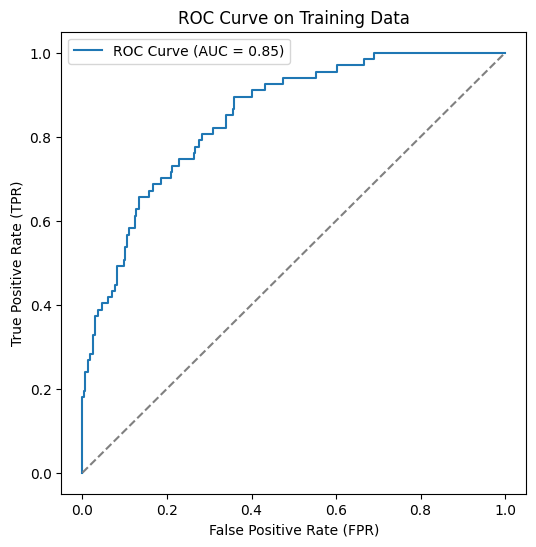

In [74]:
# Training Data Evaluation Metrics

# Predictions (discrete)
y_train_pred = model.predict(X_train)

print("Training Data Evaluation Metrics:")

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = cm_train.ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Precision & Recall
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Continuous scores for AUROC
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_train)[:, 1]
elif hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_train)
else:
    y_scores = y_train_pred  # fallback (not ideal)

# AUROC
roc_auc = roc_auc_score(y_train, y_scores)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_train, y_scores)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve on Training Data")
plt.legend()
plt.show()


Analyzing the performace on the training data

Test Data Evaluation Metrics:
True Positives (TP): 13
False Positives (FP): 27
True Negatives (TN): 55
False Negatives (FN): 4
Precision: 0.325
Recall: 0.765
AUC-ROC Score: 0.7374


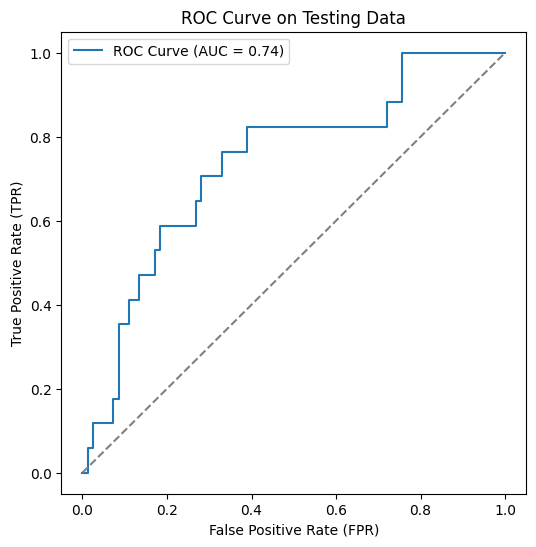

In [75]:
# Testing Data Evaluation Metrics

# Predictions (discrete)
y_test_pred = model.predict(X_test)

print("Test Data Evaluation Metrics:")

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm_test.ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Precision & Recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Continuous scores for AUROC
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_test)[:, 1]
elif hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_test)
else:
    y_scores = y_test_pred  # fallback (not ideal)

# AUROC
roc_auc = roc_auc_score(y_test, y_scores)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve on Testing Data")
plt.legend()
plt.show()

In [76]:
# # Top Feature Analysis for Random Forest Classifier

# # Step 1: get mask from VarianceThreshold
# vt = model.named_steps["variance_threshold"]
# vt_mask = vt.get_support()
# vt_features = feature_names[vt_mask]  # surviving features after variance threshold

# # Step 2: get mask from SelectKBest
# skb = model.named_steps["select"]
# skb_mask = skb.get_support()
# skb_features = vt_features[skb_mask]  # surviving features after SelectKBest

# # Step 3: get feature importances from RandomForest
# clf = model.named_steps["clf"]
# importances = clf.feature_importances_

# # Step 4: zip names + importances
# feature_importances = sorted(
#     zip(skb_features, importances),
#     key=lambda x: x[1],
#     reverse=True
# )

# # Display top features
# print("Top 10 features:")
# for feat, score in feature_importances[:10]:
#     print(f"{feat}: {score:.4f}")

In [77]:
def analyze_top_features(model, feature_names, top_n=15):
    """
    Analyze top features for a fitted sklearn pipeline with feature selection + classifier.
    Works for RandomForest (feature_importances_) and LogisticRegression (coef_).
    
    Parameters
    ----------
    model : fitted sklearn Pipeline
        The best estimator (e.g., from GridSearchCV.best_estimator_).
    feature_names : array-like
        Original feature names before feature selection.
    top_n : int
        Number of top positive/negative features to display.
    """

    # Step 1: VarianceThreshold
    vt = model.named_steps.get("variance_threshold")
    if vt is not None:
        vt_mask = vt.get_support()
        vt_features = feature_names[vt_mask]
    else:
        vt_features = feature_names

    # Step 2: SelectKBest
    skb = model.named_steps.get("select")
    if skb is not None:
        skb_mask = skb.get_support()
        skb_features = vt_features[skb_mask]
    else:
        skb_features = vt_features

    # Step 3: Classifier
    clf = model.named_steps["clf"]

    # --- Case 1: Tree-based models ---
    if hasattr(clf, "feature_importances_"):
        importances = clf.feature_importances_
        df = pd.DataFrame({
            "feature": skb_features,
            "importance": importances
        }).sort_values("importance", ascending=False)

        print(f"\nTop {top_n} features (importance only):")
        print(df.head(top_n))

        return df

    # --- Case 2: Linear models (e.g. Logistic Regression) ---
    elif hasattr(clf, "coef_"):
        if clf.coef_.shape[0] == 1:  
            coefs = clf.coef_[0]  # binary classification
        else:
            coefs = np.mean(clf.coef_, axis=0)  # average for multiclass

        df = pd.DataFrame({
            "feature": skb_features,
            "coefficient": coefs
        }).sort_values("coefficient", ascending=False)

        print(f"\nTop {top_n} POSITIVE features (increase recurrence likelihood):")
        print(df.head(top_n))

        print(f"\nTop {top_n} NEGATIVE features (protective against recurrence):")
        print(df.tail(top_n))

        return df

    else:
        raise ValueError("Classifier does not expose feature_importances_ or coef_")

analyze_top_features(model, feature_names)


Top 15 POSITIVE features (increase recurrence likelihood):
     feature  coefficient
17     GNAT2     0.425889
43      TCP1     0.251782
2   C11orf86     0.213202
34     PRDX6     0.147134
47      YARS     0.132387
7       CCT3     0.125172
41       SST     0.106627
45      VARS     0.100339
25     MTCH1     0.039430
15    FAM49B     0.027984
11    DCTPP1     0.000344
12      DLX6     0.000000
14     EPB49     0.000000
1   C11orf63     0.000000
13      ECE2     0.000000

Top 15 NEGATIVE features (protective against recurrence):
     feature  coefficient
46      XPO5     0.000000
36    RABL2B     0.000000
42     STIP1     0.000000
29     NOL10     0.000000
37   RACGAP1     0.000000
35    PSMD11     0.000000
24      MSX2    -0.042517
4   C9orf103    -0.046286
32     PCSK4    -0.054038
49     ZNF69    -0.082933
0    ADAMTS8    -0.104510
21      LBX2    -0.120231
31     NPAS3    -0.139743
40      SMG6    -0.194347
5     CARD10    -0.220347


,feature,coefficient
17,GNAT2,0.425889
43,TCP1,0.251782
2,C11orf86,0.213202
34,PRDX6,0.147134
47,YARS,0.132387
7,CCT3,0.125172
41,SST,0.106627
45,VARS,0.100339
25,MTCH1,0.039430
15,FAM49B,0.027984


In [78]:
# X_train.columns = [None] * X_train.shape[1]
# y_train_pred = model.predict(X_train)

# cm_test = confusion_matrix(y_train, y_train_pred)
# tn, fp, fn, tp = cm_test.ravel()
# print(f"True Positives (TP): {tp}")
# print(f"False Positives (FP): {fp}")
# print(f"True Negatives (TN): {tn}")
# print(f"False Negatives (FN): {fn}")

# # Calculate metrics
# precision = tp / (tp + fp) if (tp + fp) > 0 else 0
# recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")

# # Compute the AUC-ROC score
# roc_auc = roc_auc_score(y_train, y_train_pred)

# # Print the AUC-ROC score
# print(f"AUC-ROC Score: {roc_auc:.4f}")


# # Compute ROC curve
# fpr, tpr, _ = roc_curve(y_train, y_train_pred)

# # Plot the ROC Curve
# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, linestyle='-', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
# plt.xlabel("False Positive Rate (FPR)")
# plt.ylabel("True Positive Rate (TPR)")
# plt.title("ROC Curve on Training Data")
# plt.legend()
# plt.show()



# y_test_pred = model.predict(X_test)

# cm_test = confusion_matrix(y_test, y_test_pred)
# tn, fp, fn, tp = cm_test.ravel()
# print(f"True Positives (TP): {tp}")
# print(f"False Positives (FP): {fp}")
# print(f"True Negatives (TN): {tn}")
# print(f"False Negatives (FN): {fn}")

# # Calculate metrics
# precision = tp / (tp + fp) if (tp + fp) > 0 else 0
# recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")

# # Compute the AUC-ROC score
# roc_auc = roc_auc_score(y_test, y_test_pred)

# # Print the AUC-ROC score
# print(f"AUC-ROC Score: {roc_auc:.4f}")

# # Compute ROC curve
# fpr, tpr, _ = roc_curve(y_test, y_test_pred)

# # Plot the ROC Curve
# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, linestyle='-', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
# plt.xlabel("False Positive Rate (FPR)")
# plt.ylabel("True Positive Rate (TPR)")
# plt.title("ROC Curve on Testing Data")
# plt.legend()
# plt.show()
